# Telecom churn using PCA
Predict whether a particular customer is about to churn.

In [118]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [119]:
churn_data=pd.read_csv("churn_data.csv")
customer_data=pd.read_csv("customer_data.csv")
internet_data=pd.read_csv("internet_data.csv")
print(internet_data.shape,customer_data.shape,churn_data.shape)
print(customer_data.head())
print(churn_data.head())
print(internet_data.head())

(7043, 9) (7043, 5) (7043, 9)
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No
   customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0           Electronic check           29.85        29.85    No  
1               Mailed check           56.95       1889.5    No  
2        

In [120]:
df=pd.merge(customer_data,internet_data,how='inner',on='customerID')
telecom=pd.merge(df,churn_data,how='inner',on='customerID')
print(telecom.shape)
telecom.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [121]:
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [122]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [123]:
# Binary mapping
telecom_bin=['Partner','Dependents','PhoneService','PaperlessBilling','Churn','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
             'StreamingTV','StreamingMovies']
def bin_map(x):
    x=x.map({'Yes':1,'No':0})
    return x
telecom[telecom_bin]=telecom[telecom_bin].apply(bin_map)
gender_map=lambda x:0 if x=='Female' else 1
telecom['gender']=telecom['gender'].apply(gender_map)
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,No phone service,DSL,0.0,1.0,0.0,...,0.0,0.0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,No,DSL,1.0,0.0,1.0,...,0.0,0.0,34,1,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,No,DSL,1.0,1.0,0.0,...,0.0,0.0,2,1,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,No phone service,DSL,1.0,0.0,1.0,...,0.0,0.0,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,No,Fiber optic,0.0,0.0,0.0,...,0.0,0.0,2,1,Month-to-month,1,Electronic check,70.70,151.65,1


In [124]:
#dummy variable creation
telecom_cat=['MultipleLines','InternetService','Contract','PaymentMethod']
df=pd.get_dummies(telecom[telecom_cat],drop_first=True)
# cocatinating the dummy variables
telecom=pd.concat([telecom,df],axis=1)
# dropping the original variables
telecom=telecom.drop(telecom_cat,axis=1)
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,1.0,0.0,1.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0


In [125]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   OnlineSecurity                         5517 non-null   float64
 6   OnlineBackup                           5517 non-null   float64
 7   DeviceProtection                       5517 non-null   float64
 8   TechSupport                            5517 non-null   float64
 9   StreamingTV                            5517 non-null   float64
 10  StreamingMovies                        5517 non-null   float64
 11  tenu

In [126]:
#checking for missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                                0.00
gender                                    0.00
SeniorCitizen                             0.00
Partner                                   0.00
Dependents                                0.00
OnlineSecurity                           21.67
OnlineBackup                             21.67
DeviceProtection                         21.67
TechSupport                              21.67
StreamingTV                              21.67
StreamingMovies                          21.67
tenure                                    0.00
PhoneService                              0.00
PaperlessBilling                          0.00
MonthlyCharges                            0.00
TotalCharges                              0.00
Churn                                     0.00
MultipleLines_No phone service            0.00
MultipleLines_Yes                         0.00
InternetService_Fiber optic               0.00
InternetService_No                        0.00
Contract_One 

In [127]:
# all the columns with missing values are categorical and hence we can impute missing values with 0
telecom=telecom.fillna(0)
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
gender                                   0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
OnlineSecurity                           0.0
OnlineBackup                             0.0
DeviceProtection                         0.0
TechSupport                              0.0
StreamingTV                              0.0
StreamingMovies                          0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
MultipleLines_No phone service           0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
Contract_One year                        0.0
Contract_T

In [128]:
print(telecom.shape)
telecom=telecom[telecom.TotalCharges!=" "]
print(telecom.shape)

(7043, 26)
(7032, 26)


In [129]:
#converting totalCharges to float
cnvrt=lambda x:float(x)
telecom['TotalCharges']=telecom['TotalCharges'].apply(cnvrt)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   OnlineSecurity                         7032 non-null   float64
 6   OnlineBackup                           7032 non-null   float64
 7   DeviceProtection                       7032 non-null   float64
 8   TechSupport                            7032 non-null   float64
 9   StreamingTV                            7032 non-null   float64
 10  StreamingMovies                        7032 non-null   float64
 11  tenu

### Checking for outliers

In [130]:
#checking 25,50,75,90,95,99 percentage of data
telecom_num=['tenure','MonthlyCharges','TotalCharges']
telecom[telecom_num].describe(percentiles=[.25,.5,.75,.9,.95,.99])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
90%,69.000000,102.645000,5976.640000
95%,72.000000,107.422500,6923.590000
99%,72.000000,114.734500,8039.883000


### Feature standardization

In [131]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
telecom[telecom_num]=scaler.fit_transform(telecom[telecom_num])
telecom[telecom_num].describe(percentiles=[.25,.5,.75,.9,.95,.99])

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.214741e-16,9.652878e-17,-1.172113e-16
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,9.199259e-01,8.331482e-01,6.668271e-01
90%,1.490341e+00,1.258044e+00,1.629455e+00
95%,1.612573e+00,1.416850e+00,2.047238e+00
99%,1.612573e+00,1.659904e+00,2.539732e+00


### Observing the churn rate


In [132]:
100*(len(telecom[telecom.Churn==1])/len(telecom))

26.578498293515356

We almost have 27% churn rate.

## Model Building

### Splitting the data into train test 

In [133]:
from sklearn.model_selection import train_test_split
telecom=telecom.drop("customerID",axis=1)
y=telecom.pop('Churn')
X=telecom

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4922, 24) (2110, 24) (4922,) (2110,)


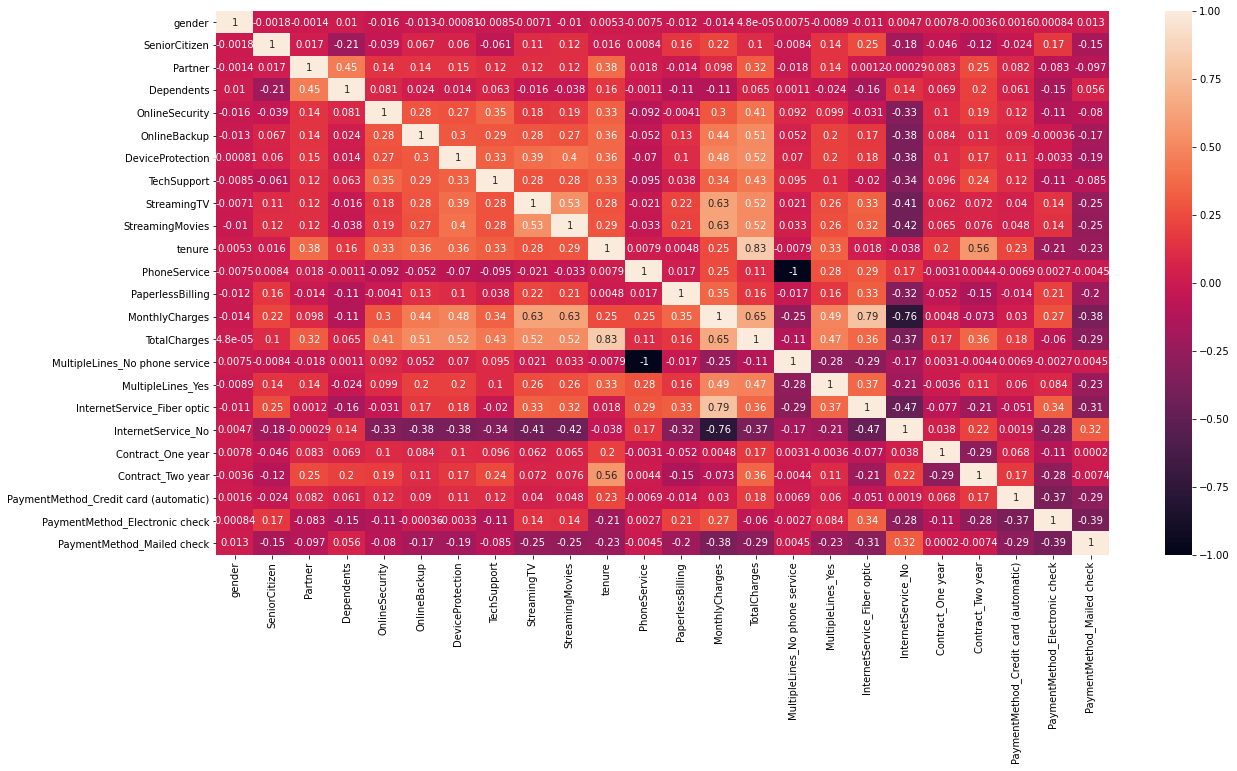

In [134]:
# building a correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(),annot=True)

### Using PCA 

In [135]:
from sklearn.decomposition import PCA
pca=PCA(random_state=42)
pca.fit(X_train)
pca.components_

array([[ 3.25806656e-04,  3.43450004e-02,  9.77536025e-02,
         1.32458802e-02,  1.16941637e-01,  1.55362607e-01,
         1.61356147e-01,  1.24472131e-01,  1.76124882e-01,
         1.77121292e-01,  4.49704307e-01,  2.07813160e-02,
         7.02485716e-02,  4.80457660e-01,  5.71249087e-01,
        -2.07813160e-02,  1.57998039e-01,  1.45078677e-01,
        -1.31529290e-01,  2.98835159e-02,  7.79494609e-02,
         4.43186859e-02,  1.27857352e-02, -9.87401069e-02],
       [ 1.02755981e-02, -8.26852528e-02,  1.47909087e-01,
         1.41340962e-01,  5.64975928e-02, -5.10535587e-03,
        -1.60477588e-02,  3.91850877e-02, -1.18854253e-01,
        -1.16405591e-01,  5.62584666e-01, -4.45689790e-02,
        -1.71497583e-01, -5.27955235e-01,  1.75165793e-01,
         4.45689790e-02, -5.64585301e-02, -2.96996299e-01,
         2.12254520e-01,  6.22030017e-02,  2.32765335e-01,
         9.10126798e-02, -2.27514582e-01,  6.83271544e-02],
       [-2.82556559e-02, -1.34096694e-01, -7.96363136e

Looking at explained variance ratio of each component.

In [136]:
pca.explained_variance_ratio_

array([3.92052610e-01, 1.63501723e-01, 4.93337858e-02, 3.88874444e-02,
       3.64489451e-02, 3.48896174e-02, 3.01838340e-02, 2.88234606e-02,
       2.76168107e-02, 2.63957218e-02, 2.16565040e-02, 2.03901071e-02,
       2.00049658e-02, 1.87127515e-02, 1.74472251e-02, 1.54377103e-02,
       1.53133542e-02, 1.36732643e-02, 8.73567028e-03, 7.81738100e-03,
       7.11792241e-03, 5.50554941e-03, 5.36420326e-05, 1.43899224e-34])

Making scree plots

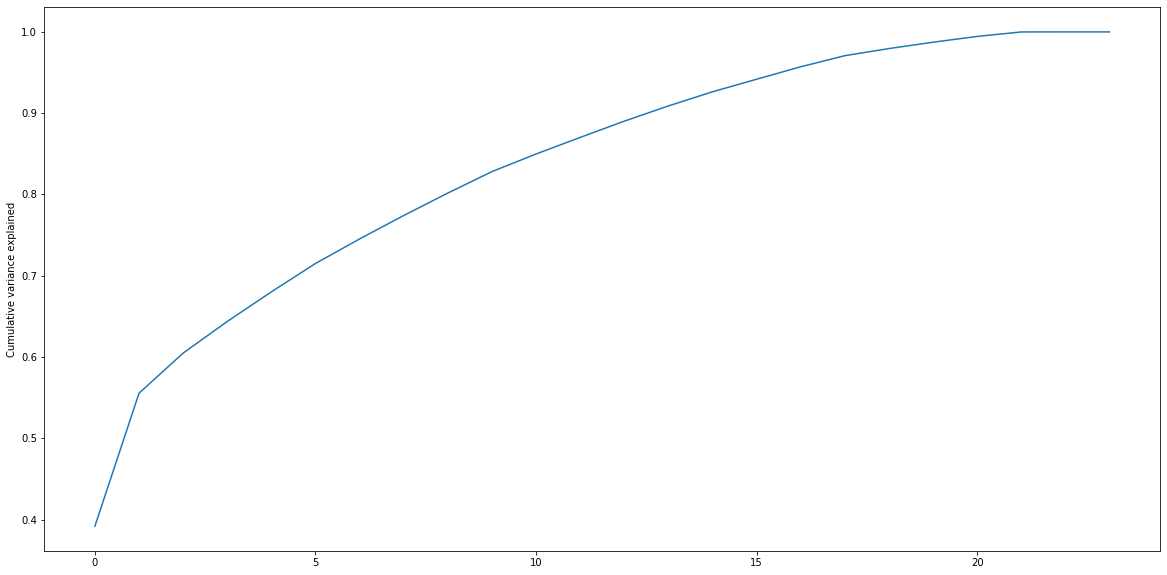

In [137]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[20,10])
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Building the final model with 16 components.

In [138]:
from sklearn.decomposition import IncrementalPCA
pca_final=IncrementalPCA(n_components=18)
df_train_pca=pca_final.fit_transform(X_train)
df_train_pca.shape

(4922, 18)

In [139]:
corrmat=np.corrcoef(df_train_pca.transpose())
corrmat.shape

(18, 18)

### Building heatmap

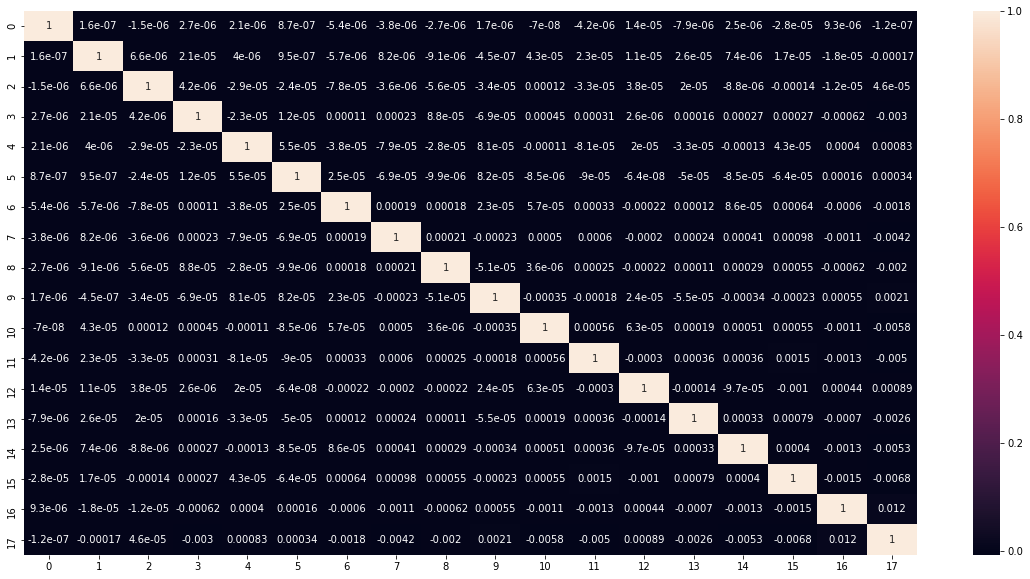

In [140]:
plt.figure(figsize=(20,10))
sns.heatmap(corrmat,annot=True)

Applying tansformation on test data

In [141]:
df_test_pca=pca_final.transform(X_test)
df_test_pca.shape

(2110, 18)

### Applying Logistic regression

In [142]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm_pca=lm.fit(df_train_pca,y_train)

Making predictions on test set

In [143]:
pred_prob=lm_pca.predict_proba(df_test_pca)

In [144]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred_prob[:,1])

0.831233357622209

#### Making it more unsupervised

In [145]:
pca_2=PCA(0.9)
df_train_pca2=pca_2.fit_transform(X_train)
df_train_pca2.shape

(4922, 14)

In [146]:
lm_2=LogisticRegression()
lm_pca2=lm_2.fit(df_train_pca2,y_train)

In [147]:
df_test_pca2=pca_2.transform(X_test)
df_test_pca2.shape

(2110, 14)

In [148]:
pred_prob=lm_pca2.predict_proba(df_test_pca2)

In [150]:
roc_auc_score(y_test,pred_prob[:,1])

0.8253286869613717